<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# Final Assignment - Statistics for Data Science with Python

## Project Scenario: 

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?


Generate basic statistics and visualizations for upper management. 
Use the appropriate tests to answer the questions provided.

## Become familiar with the dataset:

## Dataset: 
Housing prices derived from the U.S. Census Servic

### Dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Import the required libraries we need for the lab.

In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [17]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [29]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [30]:
boston_df=pd.read_csv(boston_url)

In [31]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [13]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

# TASK 4

### Q.1. Provide a boxplot for the "Median value of owner-occupied homes"

Text(0.5, 1.0, 'Owner-occupied homes')

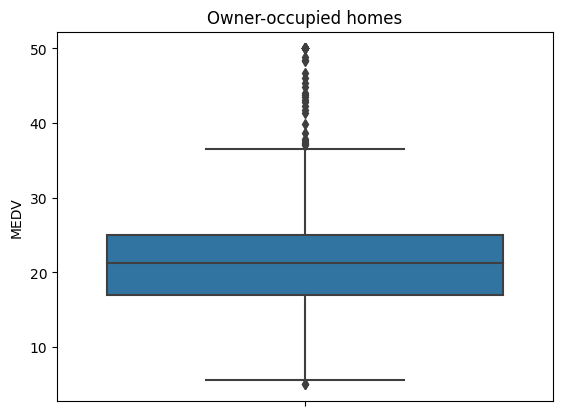

In [14]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Owner-occupied homes')

The boxplot shows the median values of owner-occupied homes and outliers

### Q.2. Provide a  bar plot for the Charles river variable

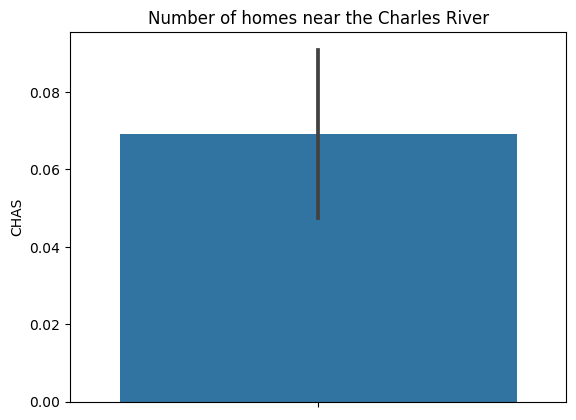

In [18]:
ax = sns.barplot(y="CHAS", data=boston_df)
ax.set_title('Number of homes near the Charles River')
plt.show()

## Q.3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [32]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

In [33]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

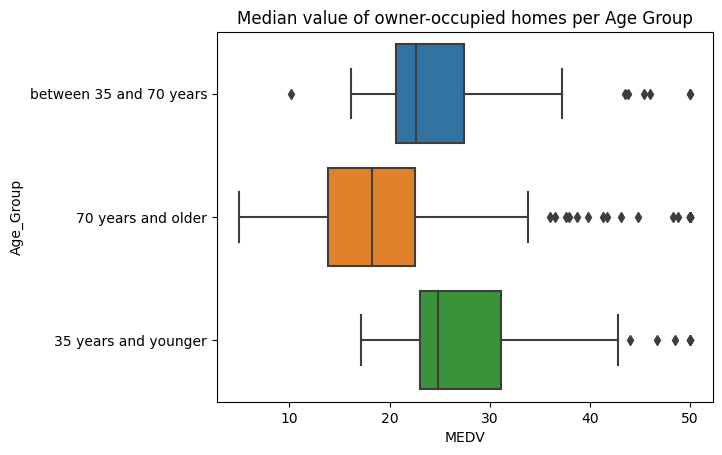

In [21]:
ax = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
ax.set_title('Median value of owner-occupied homes per Age Group')

We can state that the median value of owner occupied homes is higher when the age is lower

## Q.4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Nitric oxide concentration versus proportion of non-retail business acres per town')

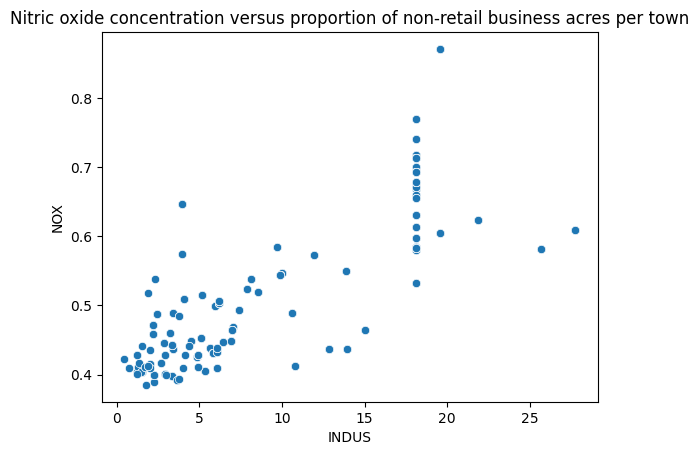

In [22]:
ax4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax4.set_title('Nitric oxide concentration versus proportion of non-retail business acres per town')

There is a positive correlation between nitric oxide concentrations and the proportion of non-retail business acres per town. 
Higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

## Q.5. Create a histogram for the pupil to teacher ratio variable

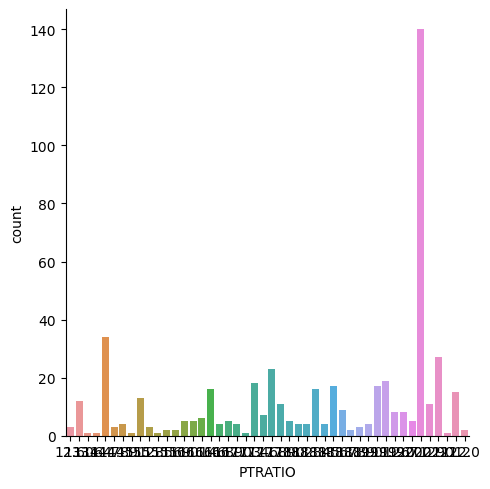

In [23]:
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
plt.show()

<ipython-input-41-cf0ffee4798c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  histplot = sns.distplot(boston_df['PTRATIO'])


[Text(0.5, 0, 'Pupil-Teacher ratio by town'),
 Text(0, 0.5, 'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')]

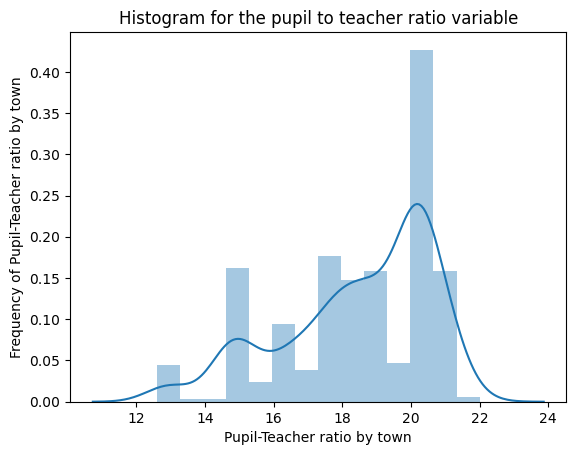

In [41]:
histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

# Task 5
## Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### Q.1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ "there is no statistical difference in median value between houses bounded by the Charles River and not bounded by the Charles River"
*   $H\_1: µ\_1 ≠ µ\_2$ "there is a statistical difference in median value between houses bounded by the Charles River and not bounded by the Charles River"

In [34]:
boston_df.loc[(boston_df['CHAS'] == 0), 'DISTANCE'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'DISTANCE'] = 'NEAR'
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,DISTANCE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,FAR


In [35]:
scipy.stats.ttest_ind(boston_df[boston_df['DISTANCE'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['DISTANCE'] == 'NEAR']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference between houses bounded by the Charles River and not bounded by the Charles River

### Q.2.Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ "there is no statistical difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940"
*   $H\_1: µ\_1 ≠ µ\_2$ "there is a statistical difference in in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940"


In [37]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Since the p-value is less than 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

### Q.3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

*   $H\_0:$ "there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town"
*   $H\_1:$ "Nitric oxide concentrations and proportion of non-retail business acres per town are correlated"

In [38]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

As Pearson Coefficient is 0.76365 and p-value less than 0.05, we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town

### Q.4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis

*   $H\_0:$ "there is no impact of an additional weighted distance to the five Boston emploment centres on the median value of owner occupied homes"
*   $H\_1: $ "there is an impact of an additional weighted distance to the five Boston emploment centres on the median value of owner occupied homes"

In [40]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        18:30:44   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres .